In [43]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing


import seaborn as sns
import os

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\an_na\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\an_na\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# testing with original metadata

In [46]:
df = pd.read_csv('data/movie_scripts/movie_metadata/movie_meta_data.csv')

In [47]:
df.sample(5)

,imdbid,title,akas,year,metascore,imdb user rating,number of imdb user votes,awards,opening weekend,producers,...,casting directors,cast,countries,age restrict,plot,plot outline,keywords,genres,taglines,synopsis
508,119217,Good Will Hunting,"Will Hunting (France), Good Will Hunting - Der...",1997,70,8,850272,"Oscar 1998, Golden Globe 1998, Actor 1998, Fel...","United States: $10,261,471, 11 Jan 1998","Su Armstrong, Lawrence Bender, Jonathan Gordon...",...,"Kerry Barden, Suzanne Crowley, Billy Hopkins","Matt Damon, Ben Affleck, Stellan Skarsgård, Jo...",United States,"Argentina:13, Argentina:Atp, Australia:M, Belg...","Will Hunting, a janitor at M.I.T., has a gift ...",A touching tale of a wayward young man who str...,"professor, genius, mathematical-genius, friend...","Drama, Romance","Some people can never believe in themselves, u...",Though Will Hunting (Matt Damon) has genius-le...
1690,804059,Mr and Mrs Smith? Of Course You Are!,NaN,1997,-1,-1,-1,NaN,NaN,"Henrietta Conrad, Sebastian Scott",...,NaN,"Mel Giedroyc, Sue Perkins, Brian Burchill, Eil...",NaN,NaN,NaN,NaN,NaN,"Music, Talk-Show",NaN,NaN
2178,1531804,Murderland,"Mordet (Finland, Swedish title), Aina kolmante...",2009,-1,6,452,NaN,NaN,NaN,...,NaN,"Robbie Coltrane, Amanda Hale, Bel Powley, Shar...",United Kingdom,"Australia:M, United Kingdom:15, United States:...",A thriller that tells a traumatic murder story...,NaN,"multiple-perspectives, scene-of-the-crime, mur...","Crime, Drama, Mystery",NaN,NaN
549,337636,Hellraiser: Deader,"Hellraiser VII: Deader (United States), Hellra...",2005,-1,4,9009,Chainsaw Award 2006,NaN,"David S. Greathouse, Vlad Paunescu, Nick Phill...",...,"Karen Meisels, Adrienne Stern","Kari Wuhrer, Ionut Chermenski, Hugh Jorgin, Li...","United States, Romania","Australia:MA15+, Brazil:18, Canada:R, Canada:R...",A journalist uncovers an underground group who...,"In London, after investigating crack addicted ...","newspaper-office, hallucination, subway, suici...","Horror, Mystery, Thriller",The Latest. Most Terrifying Evil.,"""Hellraiser: Deader"" begins in a crack den wit..."
1389,7100408,Southern Belle,NaN,2017,-1,6,25,"Grand Prix 2017, IBAFF Award 2018, Internation...",NaN,"Frédéric de Belloy, Elsa Klughertz",...,NaN,Taelor Ranzau,France,France:Tous publics::(with warning),Cherished daughter of a billionaire oil-tycoon...,Cherished daughter of a billionaire oil-tycoon...,"inheritance, rich, singing, photograph, mother...",Documentary,NaN,NaN


In [48]:
df.dtypes

imdbid                        int64
title                        object
akas                         object
year                          int64
metascore                     int64
imdb user rating              int64
number of imdb user votes     int64
awards                       object
opening weekend              object
producers                    object
budget                       object
script department            object
production companies         object
writers                      object
directors                    object
casting directors            object
cast                         object
countries                    object
age restrict                 object
plot                         object
plot outline                 object
keywords                     object
genres                       object
taglines                     object
synopsis                     object
dtype: object

In [49]:
df_test = df[['imdbid','title', 'metascore', 'imdb user rating']]
df_test

,imdbid,title,metascore,imdb user rating
0,120770,A Night at the Roxbury,26,6
1,132512,At First Sight,40,6
2,118661,The Avengers,12,3
3,215545,Bamboozled,54,6
4,118715,The Big Lebowski,71,8
...,...,...,...,...
2853,114924,While You Were Sleeping,67,6
2854,3011894,Wild Tales,77,8
2855,5362988,Wind River,73,7
2856,120901,Wrongfully Accused,-1,6


In [50]:
# df_test['file_name'] = f'data/movie_scripts/raw_text_lemmas/{df_test['title']}_{df_test['imdbid']_lemmas.txt}'
# df_test['file_name'] =  df_test.agg(lambda x: f"{x['title']}_{x['imdbid']:07d}_lemmas.txt", axis=1)

In [51]:
df_test['imdbid'] = df_test['imdbid'].apply(lambda x: f'{x:07d}')

C:\Users\an_na\AppData\Local\Temp\ipykernel_64252\461486275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['imdbid'] = df_test['imdbid'].apply(lambda x: f'{x:07d}')


In [52]:
df_test.head()

,imdbid,title,metascore,imdb user rating
0,0120770,A Night at the Roxbury,26,6
1,0132512,At First Sight,40,6
2,0118661,The Avengers,12,3
3,0215545,Bamboozled,54,6
4,0118715,The Big Lebowski,71,8


In [53]:


# Folder containing the text files
folder_path = 'data/movie_scripts/screenplay_data/data/raw_text_lemmas/raw_text_lemmas/'

# List to store the contents of the text files
texts = []
counter = 0
ids_with_files = []
# Iterate through each ID in the DataFrame
for file_id in df_test['imdbid']:
    # Find the file that contains the ID
    for filename in os.listdir(folder_path):
        if file_id in filename:
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)
            # Open and read the file content
            with open(file_path, 'r', encoding="utf-8") as file:
                content = file.read()
                # Add the content to the list
                texts.append(content)
                ids_with_files.append(file_id)
                counter += 1
                print(counter)
            break  # Break the loop once the file is found

df_corr = df_test[df_test['imdbid'].isin(ids_with_files)].reset_index(drop=True)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [54]:
df_corr.shape

(2853, 4)

In [55]:
df_corr['good_meta'] = df_corr['metascore'].apply(lambda x: 1 if x >= 60 else 0)
y = df_corr['good_meta']

In [56]:
df_corr.groupby('good_meta').count()


,imdbid,title,metascore,imdb user rating
good_meta,,,,
0,1620,1620,1620,1620
1,1233,1233,1233,1233


In [57]:
# Step 3: TF-IDF Vectorization
vect= TfidfVectorizer(max_features=500).fit(texts)
X = vect.transform(texts)



In [ ]:
sorted(vect.vocabulary_.items(), key=lambda x: x[1])[10:30]

[('almost', 10),
 ('alone', 11),
 ('along', 12),
 ('already', 13),
 ('always', 14),
 ('and', 15),
 ('angle', 16),
 ('another', 17),
 ('answer', 18),
 ('any', 19),
 ('anything', 20),
 ('apartment', 21),
 ('appear', 22),
 ('approach', 23),
 ('arm', 24),
 ('around', 25),
 ('as', 26),
 ('ask', 27),
 ('at', 28),
 ('away', 29)]

In [ ]:

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train SVM
svm = SVC()
svm.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.90      0.67       306
           1       0.41      0.08      0.14       265

    accuracy                           0.52       571
   macro avg       0.47      0.49      0.40       571
weighted avg       0.47      0.52      0.42       571



# Testing with merged_master

In [2]:
df = pd.read_csv('data/movie_metadata_master.csv')

In [3]:
df['imdbid'] = df['imdbid'].apply(lambda x: f'{x:07d}')

In [4]:
# Folder containing the text files
folder_path = 'data/movie_scripts/screenplay_data/data/raw_text_lemmas/raw_text_lemmas/'

# List to store the contents of the text files
texts = []
counter = 0
ids_with_files = []
# Iterate through each ID in the DataFrame
for file_id in df['imdbid']:
    # Find the file that contains the ID
    for filename in os.listdir(folder_path):
        if file_id in filename:
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)
            # Open and read the file content
            with open(file_path, 'r', encoding="utf-8") as file:
                content = file.read()
                # Add the content to the list
                texts.append(content)
                ids_with_files.append(file_id)
                counter += 1
                print(counter)
            break  # Break the loop once the file is found

df_corr = df[df['imdbid'].isin(ids_with_files)].reset_index(drop=True)
y = df_corr['financial_success']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [17]:
df_corr.head()

,imdbid,title,year,age_rating,genre,description,director,runtime_minutes,production_budget,domestic_gross,...,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_sport,genre_thriller,genre_war,genre_western,financial_success,ROI
0,1825683,Black Panther,2018,PG-13,"Action, Adventure, Sci-Fi","T'Challa, heir to the hidden but advanced king...",Ryan Coogler,134.0,200000000.0,700059566.0,...,0,0,0,1,0,0,0,0,1,6.682472
1,0092099,Top Gun,1986,PG,"Action, Drama",As students at the United States Navy's elite ...,Tony Scott,109.0,15000000.0,180470489.0,...,0,0,0,0,0,0,0,0,1,23.831301
2,0499549,Avatar,2009,PG-13,"Action, Adventure, Fantasy",A paraplegic Marine dispatched to the moon Pan...,James Cameron,162.0,237000000.0,785221649.0,...,0,0,0,0,0,0,0,0,1,12.336312
3,1392170,The Hunger Games,2012,PG-13,"Action, Adventure, Sci-Fi",Katniss Everdeen voluntarily takes her younger...,Gary Ross,142.0,80000000.0,408010692.0,...,0,0,0,1,0,0,0,0,1,8.474042
4,0120737,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,"Action, Adventure, Drama",A meek Hobbit from the Shire and eight compani...,Peter Jackson,178.0,93000000.0,315544750.0,...,0,0,0,0,0,0,0,0,1,9.582977


In [68]:
df_corr.groupby('financial_success').count()

,imdbid,title,year,age_rating,genre,description,director,runtime_minutes,production_budget,domestic_gross,...,genre_music,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_sport,genre_thriller,genre_war,genre_western,ROI
financial_success,,,,,,,,,,,,,,,,,,,,,
0,422,422,422,422,422,422,422,422,422,422,...,422,422,422,422,422,422,422,422,422,422
1,777,777,777,777,777,777,777,777,777,777,...,777,777,777,777,777,777,777,777,777,777


In [5]:
# Step 3: TF-IDF Vectorization
vect= TfidfVectorizer(max_features=500).fit(texts)
X = vect.transform(texts)


              precision    recall  f1-score   support

           0       0.50      0.01      0.02        94
           1       0.61      0.99      0.76       146

    accuracy                           0.61       240
   macro avg       0.55      0.50      0.39       240
weighted avg       0.57      0.61      0.47       240

--------------------------------------------------------------------------------


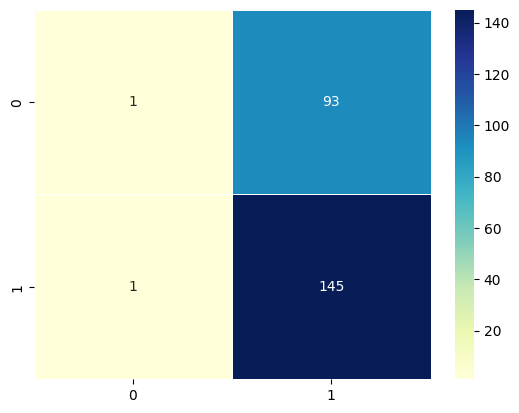

In [12]:

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train SVM
svm = SVC()
svm.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

print("--------"*10)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

Accuracy on train set: 1.0
Accuracy on test set: 0.64
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.28      0.37        94
           1       0.65      0.87      0.74       146

    accuracy                           0.64       240
   macro avg       0.61      0.57      0.56       240
weighted avg       0.62      0.64      0.60       240

--------------------------------------------------------------------------------


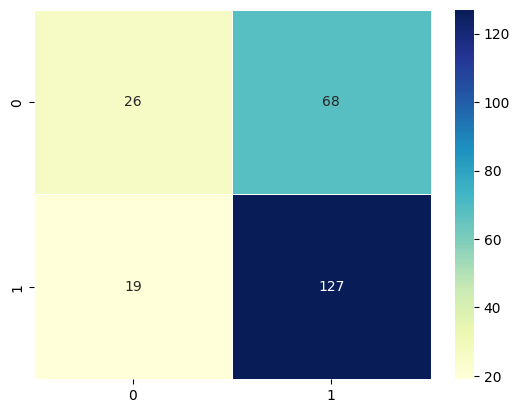

In [19]:

base = XGBClassifier()
base.fit(X_train, y_train)

y_pred_train = base.predict(X_train)
y_pred = base.predict(X_test)

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

In [27]:
# Define parameter grid for randomized search
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1,  2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5,  9],
        'learning_rate' : [0.1, 0.3, 1.0],
        'lambda' : [0.3, 1, 5]
        }


# Instantiate random search and define the metric to optimize 
rs = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='accuracy',
                  cv=5, verbose=5, n_jobs=-1, n_iter=10, random_state=0)

# Fit randomized search object to data
rs.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.5, 1, 2, 5],
                                        'lambda': [0.3, 1, 5],
                                        'learning_rate': [0.1, 0.3, 1.0],
                                        'max_depth': [3, 5, 9],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0, scoring='accuracy', verbose=5)

              precision    recall  f1-score   support

           0       0.49      0.19      0.27        94
           1       0.63      0.87      0.73       146

    accuracy                           0.60       240
   macro avg       0.56      0.53      0.50       240
weighted avg       0.57      0.60      0.55       240

ROC_score:  0.5306761877003789


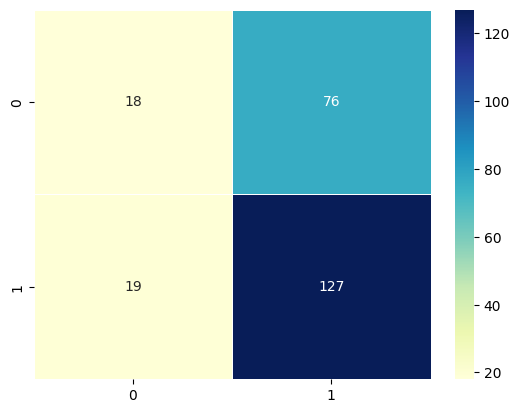

In [28]:
rs_best = rs.best_estimator_
y_pred = rs_best.predict(X_test)
print(classification_report(y_test,y_pred))
print('ROC_score: ', roc_auc_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

In [7]:
df.isna().sum()

imdbid                  0
title                   0
year                    0
age_rating              0
genre                   0
description             0
director                1
runtime_minutes         0
production_budget       0
domestic_gross          0
worldwide_gross         0
age_rating_number       0
genre_1                 0
genre_2                85
genre_3              1003
genre_action            0
genre_adventure         0
genre_animation         0
genre_biography         0
genre_comedy            0
genre_crime             0
genre_drama             0
genre_family            0
genre_fantasy           0
genre_film-noir         0
genre_history           0
genre_horror            0
genre_music             0
genre_musical           0
genre_mystery           0
genre_romance           0
genre_sci-fi            0
genre_sport             0
genre_thriller          0
genre_war               0
genre_western           0
financial_success       0
ROI                     0
dtype: int64

# Meta regression

In [75]:
age_dummies = pd.get_dummies(df_corr['age_rating_number'], prefix = 'age', drop_first=True)

In [76]:
df_corr_dum = pd.concat([df_corr, age_dummies], axis=1)


In [77]:
df_corr.columns

Index(['imdbid', 'title', 'year', 'age_rating', 'genre', 'description',
       'director', 'runtime_minutes', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'age_rating_number', 'genre_1', 'genre_2', 'genre_3',
       'genre_action', 'genre_adventure', 'genre_animation', 'genre_biography',
       'genre_comedy', 'genre_crime', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_film-noir', 'genre_history', 'genre_horror',
       'genre_music', 'genre_musical', 'genre_mystery', 'genre_romance',
       'genre_sci-fi', 'genre_sport', 'genre_thriller', 'genre_war',
       'genre_western', 'financial_success', 'ROI'],
      dtype='object')

In [78]:
X_meta = df_corr_dum.drop(['imdbid', 'title', 'year','age_rating', 'genre', 'description',
       'director', 'runtime_minutes','domestic_gross','age_rating_number',
       'worldwide_gross','genre_1', 'genre_2', 'genre_3', 'financial_success', 'ROI'], axis=1)
y_meta = df_corr['financial_success']
X_train, X_test, y_train, y_test = train_test_split(X_meta, y_meta, test_size=0.2, random_state=42)


In [84]:
X_train.shape

(959, 25)

In [79]:
X_meta.head()

,production_budget,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_drama,genre_family,genre_fantasy,...,genre_mystery,genre_romance,genre_sci-fi,genre_sport,genre_thriller,genre_war,genre_western,age_6,age_13,age_17
0,200000000.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,False,True,False
1,15000000.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,True,False,False
2,237000000.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,False,True,False
3,80000000.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,False,True,False
4,93000000.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,False,True,False


Accuracy on train set: 0.9
Accuracy on test set: 0.57
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.26      0.32        94
           1       0.62      0.77      0.68       146

    accuracy                           0.57       240
   macro avg       0.51      0.51      0.50       240
weighted avg       0.54      0.57      0.54       240

--------------------------------------------------------------------------------


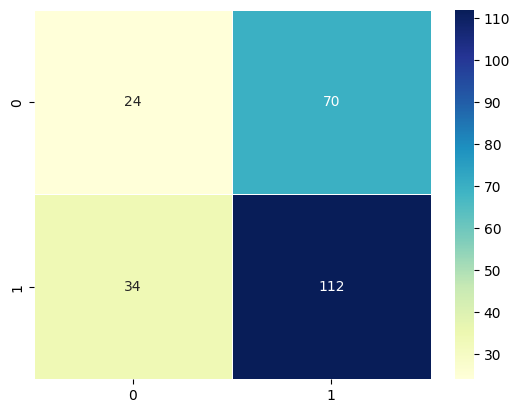

In [86]:

meta_base = XGBClassifier()
meta_base.fit(X_train, y_train)

y_pred_train = meta_base.predict(X_train)
y_pred = meta_base.predict(X_test)

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);

In [87]:
# Define parameter grid for randomized search
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1,  2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5,  9],
        'learning_rate' : [0.1, 0.3, 1.0],
        'lambda' : [0.3, 1, 5]
        }


# Instantiate random search and define the metric to optimize 
rs = RandomizedSearchCV(XGBClassifier(), param_grid, scoring='accuracy',
                  cv=5, verbose=5, n_jobs=-1, n_iter=10, random_state=0)

# Fit randomized search object to data
rs.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.5, 1, 2, 5],
                                        'lambda': [0.3, 1, 5],
                                        'learning_rate': [0.1, 0.3, 1.0],
                                        'max_depth': [3, 5, 9],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=0, scoring='accuracy', verbose=5)

              precision    recall  f1-score   support

           0       0.65      0.14      0.23        94
           1       0.63      0.95      0.76       146

    accuracy                           0.63       240
   macro avg       0.64      0.55      0.49       240
weighted avg       0.64      0.63      0.55       240

ROC_score:  0.5451763334304868


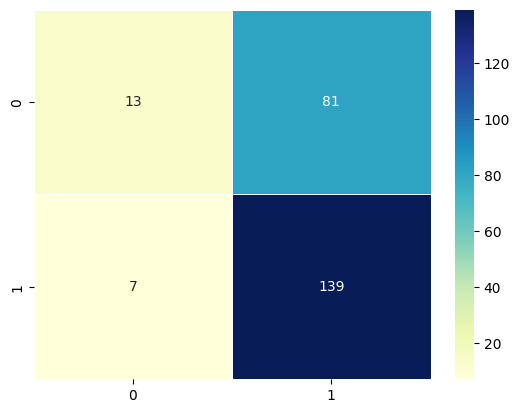

In [88]:
rs_best = rs.best_estimator_
y_pred = rs_best.predict(X_test)
print(classification_report(y_test,y_pred))
print('ROC_score: ', roc_auc_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);